Prediction of Heart Disease
In this project, we build a Machine Learning (ML) model that is capable of predicting whether a person has heart disease or not, using the medical attributes of the person. Thus, we have a binary classification problem at hand and we solve it via supervised Machine Learning.

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


%matplotlib inline

# Data Preprocessing

In [68]:
# names of the medical attributes.
medical_attributes = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                      "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

In [69]:
# import the data which is stored as comma-separated values (csv).
heart_disease = pd.read_csv("./../static/processed.cleveland.csv", names=medical_attributes)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [70]:
# check for missing values and see the datatypes of the columns.
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The number of rows is 303 and there appears to be no missing values, but the datatypes of the columns ca and thal are shown as object.

In [71]:
pd.DataFrame(heart_disease["ca"].value_counts())


,count
ca,
0.0,176
1.0,65
2.0,38
3.0,20
?,4


In [72]:
pd.DataFrame(heart_disease["thal"].value_counts())

,count
thal,
3.0,166
7.0,117
6.0,18
?,2


Unknown values can be seen in the ca and thal columns, in the form of ?. An easy way to get rid of these unknowns is to replace them with NaN value

In [73]:
heart_disease = pd.read_csv("./../static/processed.cleveland.csv" ,names=medical_attributes, na_values='?')

# check the info about the dataframe.
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


We can see that there are missing values in the dataframe now and all the columns are of numeric datatype.
Since the number of rows with missing values are very low compared to the number of available rows, let us drop the rows of the dataframe where values are missing.

In [74]:
heart_disease.dropna(inplace=True)

we shall set the non-zero values in the num column to 1 as they are indicators of heart disease.

In [75]:
# set all non-zero values in the num column to 1.
heart_disease.loc[heart_disease["num"] != 0, "num"] = 1

Now the column takes on binary values 0 (no heart disease) and 1 (heart disease).

In [76]:
# rename column from num to target.
heart_disease.rename({"num": "target"}, axis=1, inplace=True)

In [77]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [78]:
# dimension of the dataframe.
print(f"The dataframe has {heart_disease.shape[0]} rows and {heart_disease.shape[1]} columns.")

The dataframe has 297 rows and 14 columns.


# Exploratory Data Analysis


We shall split the data into features and target:

In [79]:
# features.
X = heart_disease.drop(["target"], axis=1)

# target.
y = heart_disease["target"]


Now we split the data further, to obtain a test set for final model evaluatation.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [81]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
94,63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0
186,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0
171,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0
147,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
230,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0


In [82]:
#The dimensions of the train and test feature sets are:

print(f'X_train:{X_train.shape}, X_test:{X_test.shape}')

X_train:(222, 13), X_test:(75, 13)


In [83]:
# create dataframe of the train data
heart_disease_train = pd.concat([X_train, y_train], axis=1)

heart_disease_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
94,63.0,0.0,3.0,135.0,252.0,0.0,2.0,172.0,0.0,0.0,1.0,0.0,3.0,0
186,42.0,1.0,3.0,120.0,240.0,1.0,0.0,194.0,0.0,0.8,3.0,0.0,7.0,0
171,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
147,41.0,1.0,3.0,112.0,250.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0
230,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,0


Let us look at the distribution of samples in the dataset on the basis of sex and heart disease condition.

In [84]:
sex_num_crosstab = pd.crosstab(heart_disease_train["sex"].astype(int), heart_disease_train["target"])

sex_num_crosstab

target,0,1
sex,,
0,51,19
1,69,83


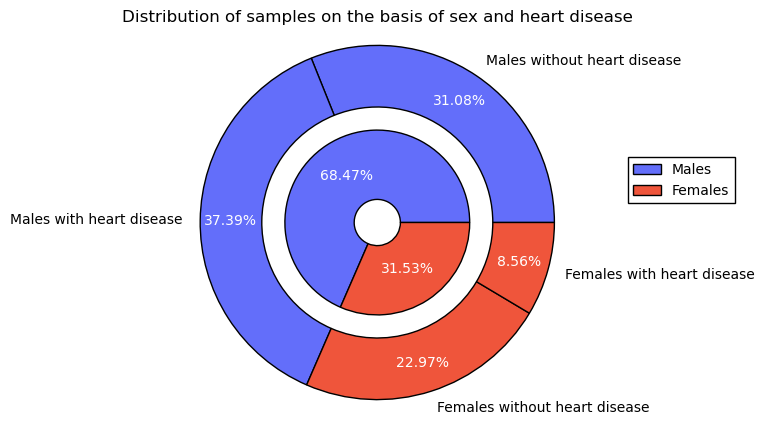

In [85]:
healthy_male_num = sex_num_crosstab.iloc[1, 0]
unhealthy_male_num = sex_num_crosstab.iloc[1, 1]
total_male_num = healthy_male_num + unhealthy_male_num

healthy_female_num = sex_num_crosstab.iloc[0, 0]
unhealthy_female_num = sex_num_crosstab.iloc[0, 1]
total_female_num = healthy_female_num + unhealthy_female_num

inner_values = [total_male_num, total_female_num]
inner_labels = ["Males", "Females"]
inner_colors = ["#636EFA", "#EF553B"]

outer_values = [healthy_male_num, unhealthy_male_num, healthy_female_num, unhealthy_female_num]
outer_labels = ["Males without heart disease", "Males with heart disease",
                "Females without heart disease", "Females with heart disease"]
outer_colors = ["#636EFA", "#636EFA", "#EF553B", "#EF553B"]

fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(x=inner_values, colors=inner_colors, radius=0.6, autopct='%1.2f%%', pctdistance=0.6,
       wedgeprops=dict(edgecolor="black", width=0.45), textprops=dict(color="white"))

*_, autotexts = ax.pie(x=outer_values, colors=outer_colors, radius=1.15, autopct='%1.2f%%', pctdistance=0.83,
                       wedgeprops=dict(edgecolor="black", width=0.4), labels=outer_labels)

for autotext in autotexts:
    autotext.set_color("white")

ax.set(aspect="equal", title="Distribution of samples on the basis of sex and heart disease");

ax.legend(inner_labels, loc=(1.15, 0.55), framealpha=1, fancybox=False, edgecolor="black");

In [86]:


def calculate_total_sex_numbers(sex_num_crosstab):
    healthy_male_num = sex_num_crosstab.iloc[1, 0]
    unhealthy_male_num = sex_num_crosstab.iloc[1, 1]
    total_male_num = healthy_male_num + unhealthy_male_num

    healthy_female_num = sex_num_crosstab.iloc[0, 0]
    unhealthy_female_num = sex_num_crosstab.iloc[0, 1]
    total_female_num = healthy_female_num + unhealthy_female_num

    return total_male_num, total_female_num



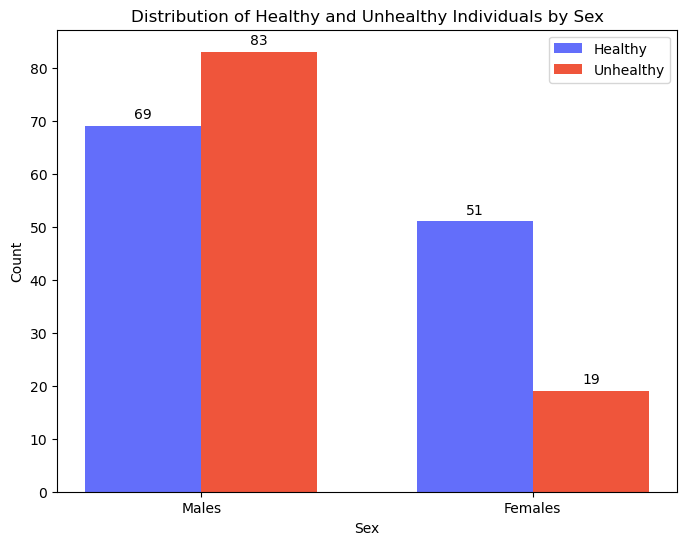

In [87]:


# Data
categories = ['Males', 'Females']
healthy_counts = [healthy_male_num, healthy_female_num]
unhealthy_counts = [unhealthy_male_num, unhealthy_female_num]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, healthy_counts, bar_width, label='Healthy', color='#636EFA')
bar2 = ax.bar([i + bar_width for i in index], unhealthy_counts, bar_width, label='Unhealthy', color='#EF553B')

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Healthy and Unhealthy Individuals by Sex')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

# Labeling bars with counts
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()


The number of male samples in the dataset is around twice the number of female samples. We also observe that only about a quarter of the female samples in the given dataset have heart disease, in contrast to the male samples where roughly half of them have heart disease. Let us now look at the age distribution of the male and female samples.

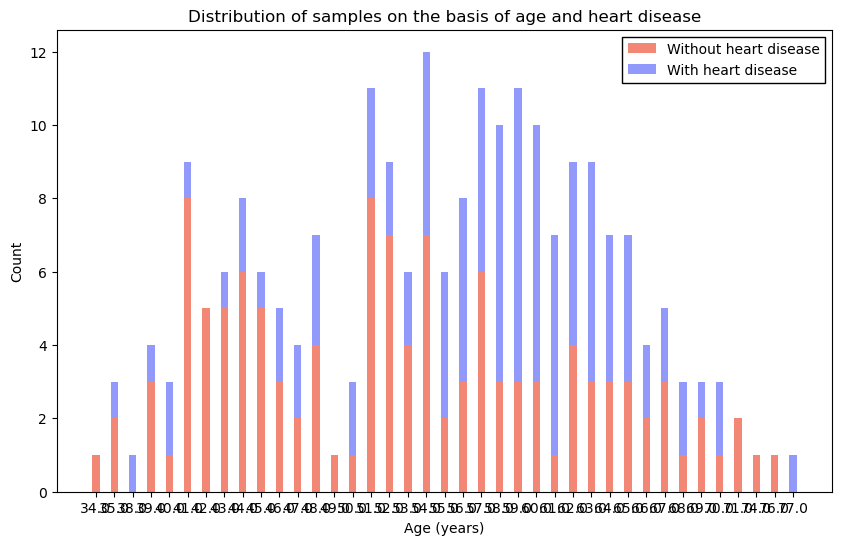

In [88]:


# Assuming you have these values calculated already
age_data_with_hd = heart_disease_train.loc[heart_disease_train["target"] == 1, "age"].value_counts()
age_data_without_hd = heart_disease_train.loc[heart_disease_train["target"] == 0, "age"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Getting unique ages from both datasets
ages = sorted(set(age_data_with_hd.index) | set(age_data_without_hd.index))

# Filling missing values with zeros
age_data_with_hd = age_data_with_hd.reindex(ages, fill_value=0)
age_data_without_hd = age_data_without_hd.reindex(ages, fill_value=0)

# Bar plots
bar_width = 0.4
index = range(len(ages))

ax.bar(index, age_data_without_hd, bar_width, color="#EF553B", alpha=0.7, label="Without heart disease")
ax.bar(index, age_data_with_hd, bar_width, color="#636EFA", alpha=0.7, label="With heart disease", bottom=age_data_without_hd)

ax.set(title="Distribution of samples on the basis of age and heart disease",
       xlabel="Age (years)", ylabel="Count")

ax.legend(fancybox=False, framealpha=1, edgecolor="black")

plt.xticks(index, ages)

plt.show()


In [89]:
pd.DataFrame(heart_disease_train.groupby(["sex", "target"])["age"].mean())

age
sex target           
0.0 0       54.980392
    1       60.157895
1.0 0       51.028986
    1       56.265060

The average age of female samples tends to exceed that of male samples, irrespective of whether they belong to the group with or without heart disease. Our next step involves examining the correlation between age and maximum heart rate across the samples.

c:\Users\khawl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


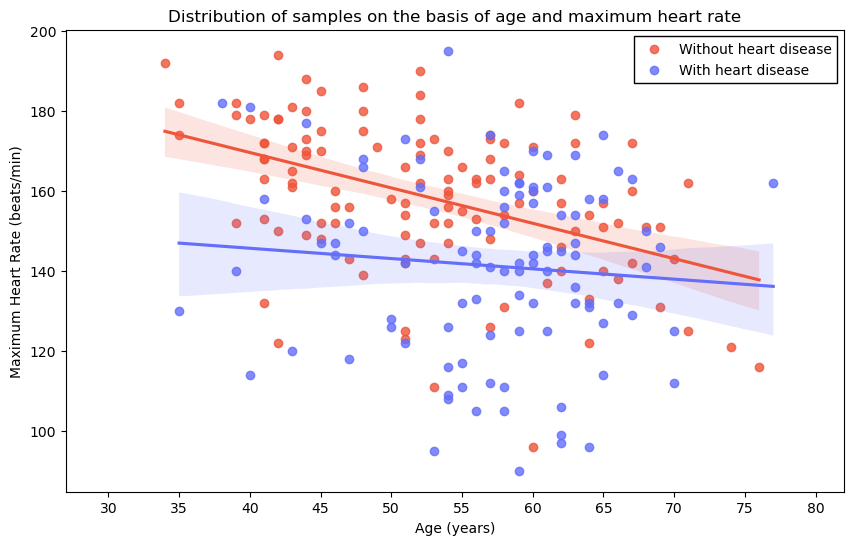

In [90]:
fig = sns.lmplot(data=heart_disease_train, x="age", y="thalach", hue="target",
                 palette=["#EF553B", "#636EFA"], aspect=1.6, height=5.4, legend=False)

fig.set(title="Distribution of samples on the basis of age and maximum heart rate",
        xlabel="Age (years)", xlim=(27, 82), xticks=range(30, 81, 5),
        ylabel="Maximum Heart Rate (beats/min)");

sns.despine(top=False, right=False)

legend_data = [fig._legend_data['0'], fig._legend_data['1']]

legend_labels = ["Without heart disease", "With heart disease"]

plt.legend(handles=legend_data, labels=legend_labels, fancybox=False, framealpha=1, edgecolor="black");

The maximum heart rate of a sample decreases with the increase in age, irrespective of the existence of heart disease.

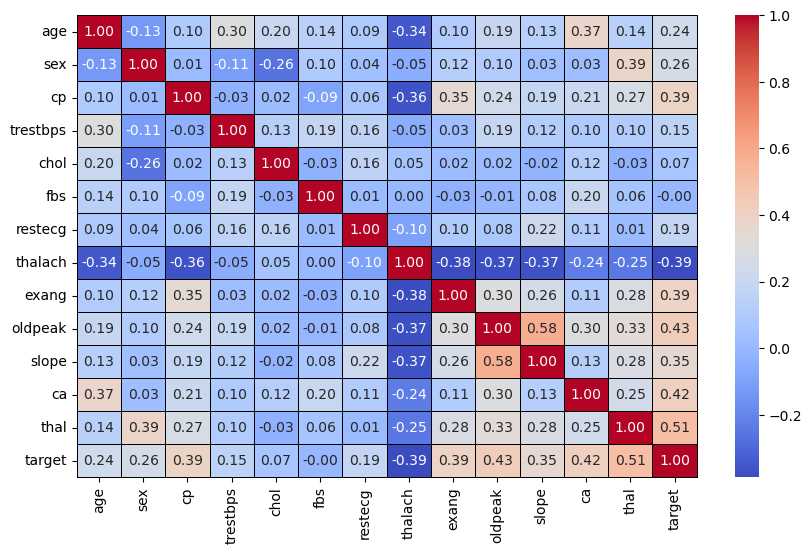

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.heatmap(data=heart_disease_train.corr(), cmap="coolwarm", annot=True,
                 fmt=".2f", linewidth=0.5, linecolor="black", clip_on=False);

# Modelling

perform feature scaling on the train and test sets using StandardScalar.

In [92]:
scalar = StandardScaler()

X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

In [93]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.926248,-1.473577,-0.194856,0.159234,0.043500,-0.447214,1.011372,0.982003,-0.699952,-0.888168,-0.939299,-0.743658,-0.923595
1,-1.410424,0.678621,-0.194856,-0.677120,-0.178925,2.236068,-1.002301,1.983904,-0.699952,-0.208260,2.344549,-0.743658,1.137090
2,-0.186453,0.678621,0.860219,0.549532,-0.438420,-0.447214,1.011372,-1.795996,1.428669,-0.888168,-0.939299,-0.743658,1.137090
3,-1.521694,0.678621,-0.194856,-1.123176,0.006429,-0.447214,-1.002301,1.300789,-0.699952,-0.888168,-0.939299,-0.743658,-0.923595
4,-0.297723,-1.473577,-0.194856,0.214991,-0.994480,-0.447214,1.011372,0.845380,-0.699952,-0.803180,0.702625,-0.743658,-0.923595


In [94]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


In [95]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
# create a dictionary to store performance scores of different models.
random_state = 42
models_to_test_dict = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(random_state=random_state),
    "LogisticRegression": LogisticRegression(random_state=random_state),
    "SVC": SVC(random_state=random_state),
    "GaussianNB": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(random_state=random_state),
    "RandomForestClassifier": RandomForestClassifier(random_state=random_state),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=random_state)
}


In [97]:

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [98]:
scores_dict = {}


In [99]:
for model_name, model in models_to_test_dict.items():
    scores_dict[model_name] = np.mean(cross_val_score(model, X_train, y_train, cv=skf, scoring="f1"))


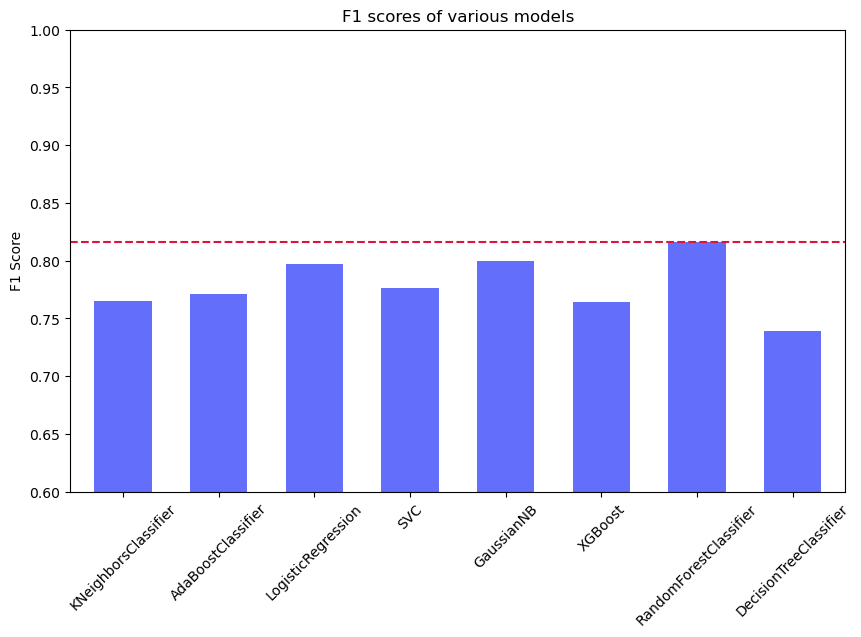

In [100]:
scores_df = pd.DataFrame(scores_dict, index=["F1 score"]).T
scores_df.plot(kind="bar", figsize=(10, 6), color="#636EFA", ylim=(0.6, 1.0),
               title="F1 scores of various models", rot=45, ylabel="F1 Score", width=0.6, legend=False)
plt.axhline(y=scores_df["F1 score"].max(), linestyle="--", color="crimson")

In [101]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

GridSearchCV can be used to find optimal values for the hyperparameters of the model. The combination of values to test are given in the dictionary below:

In [102]:
param_grid = {"solver": ["lbfgs", "liblinear"],
              "C": np.logspace(-4, 4, 40),
              "tol": [1e-3, 1e-4, 1e-5]}

In [103]:

search_obj = GridSearchCV(estimator=LogisticRegression(random_state=random_state), cv=skf,
                          param_grid=param_grid, scoring="f1", n_jobs=-1, refit=True, verbose=1)

# fit the object on the train set.
search_obj.fit(X_train, y_train);

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [104]:
#From all the possible combinations in param_grid, the best values for the hyperparameters are:

search_obj.best_params_


{'C': 2.030917620904735, 'solver': 'lbfgs', 'tol': 0.001}

Let us now compare the performance of the baseline model and the tuned model.

In [105]:
tuned_model = search_obj.best_estimator_

baseline_model = LogisticRegression(random_state=random_state)
models_dict = {"Baseline Model": baseline_model, "Tuned Model": tuned_model}

score_parameters = ["Accuracy", "Precision", "Recall", "F1"]

scores_df = pd.DataFrame(index=models_dict.keys(), columns=score_parameters)

for model_name in models_dict:
    for param in score_parameters:
        scores_list = cross_val_score(models_dict[model_name], X_train, y_train, cv=skf, scoring=param.lower())
        scores_df.loc[model_name, param] = np.mean(scores_list)

scores_df

,Accuracy,Precision,Recall,F1
Baseline Model,0.819596,0.815349,0.782857,0.796698
Tuned Model,0.82404,0.817254,0.792381,0.802505


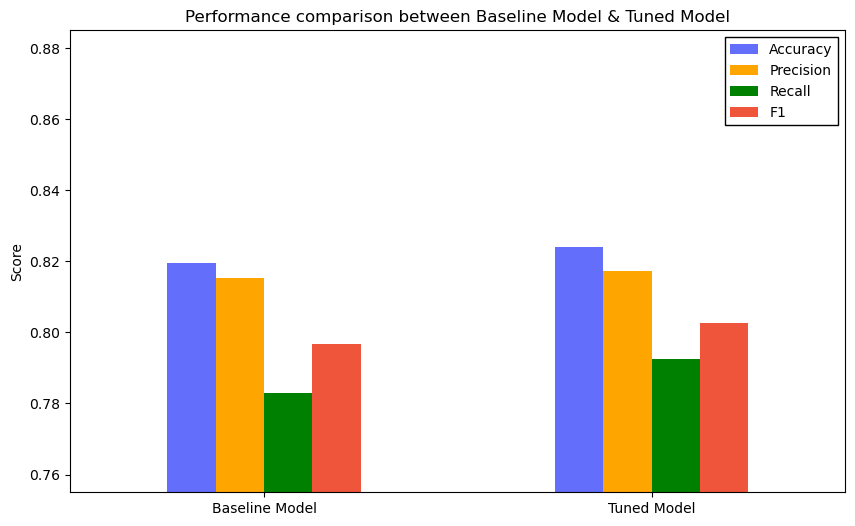

In [106]:
#Let's visualise the above model scores:

scores_df.plot(kind="bar", figsize=(10, 6), ylim=(0.755, 0.885), ylabel="Score",
               rot=0, color=["#636EFA", "orange", "green", "#EF553B"],
               title="Performance comparison between Baseline Model & Tuned Model")

plt.legend(fancybox=False, framealpha=1, edgecolor="black");

In [107]:
model = RandomForestClassifier()


In [108]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
y_pred = model.predict(X_test)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8266666666666667

In [111]:
from joblib import dump

In [112]:
dump(model,'./../savedModels/model.joblib')

['./../savedModels/model.joblib']